In [2]:
import json
import re
import nltk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

# Unduh resource yang dibutuhkan dari NLTK
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

# **EDA(exploratory data analysis)**

In [4]:
# Load data dari file JSON
file_path = "/content/FAQ_Chatbot_Updated.json"
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Menampilkan jumlah intents untuk memvalidasi data telah berhasil dimuat
print(f"Jumlah intents yang dimuat: {len(data['intents'])}")

# Contoh beberapa intents
for intent in data['intents'][:3]:  # Menampilkan 3 intents pertama
    print(f"Tag: {intent['tag']}")
    print(f"Patterns: {intent['patterns'][:2]}")  # 2 contoh patterns
    print(f"Responses: {intent['responses'][:1]}")  # 1 contoh response
    print("-" * 50)


Jumlah intents yang dimuat: 25
Tag: barang_bawaan_asrama
Patterns: ['Barang pribadi apa saja yang perlu dibawa ke asrama?', 'Apa saja barang pribadi yang harus dibawa saat check-in ke asrama?']
Responses: ['Mahasiswa dibebaskan untuk membawa barang pribadi ke asrama, namun tidak diperkenankan membawa alat elektronik selain Laptop dan Handphone. Selain itu juga tidak diperkenankan membawa senjata tajam, kompor dan lainya. Mahasiswa asrama juga diharapkan membawa alat kebersihan seperti sapu, pel dan lainya karena di asrama tidak disediakan.']
--------------------------------------------------
Tag: alur_checkin_asrama
Patterns: ['Apa itu prosedur check-in Asrama ITERA?', 'Bagaimana alur check-in untuk penghuni Asrama ITERA?']
Responses: ['Selamat datang di Asrama Mahasiswa ITERA! Prosedur check-in adalah langkah-langkah yang harus diikuti calon penghuni asrama setelah dinyatakan lolos seleksi penerimaan. Prosedur ini bertujuan untuk memastikan kenyamanan dan keamanan seluruh penghuni.\n\

In [5]:
import json
import pandas as pd

# Ekstrak maksud, pola, dan respons ke dalam DataFrame terstruktur
intents_data = []
for intent in data["intents"]:
    tag = intent["tag"]
    for pattern in intent.get("patterns", []):
        for response in intent.get("responses", []):
            intents_data.append({
                "tag": tag,
                "pattern": pattern,
                "response": response
            })

# Membuat DataFrame
df_intents = pd.DataFrame(intents_data)

#output df_intents
df_intents

,tag,pattern,response
0,barang_bawaan_asrama,Barang pribadi apa saja yang perlu dibawa ke a...,Mahasiswa dibebaskan untuk membawa barang prib...
1,barang_bawaan_asrama,Barang pribadi apa saja yang perlu dibawa ke a...,Mahasiswa diizinkan membawa barang pribadi ke ...
2,barang_bawaan_asrama,Barang pribadi apa saja yang perlu dibawa ke a...,Mahasiswa bebas membawa barang pribadi ke asra...
3,barang_bawaan_asrama,Barang pribadi apa saja yang perlu dibawa ke a...,Mahasiswa diperbolehkan membawa barang pribadi...
4,barang_bawaan_asrama,Barang pribadi apa saja yang perlu dibawa ke a...,Barang pribadi diperbolehkan untuk dibawa ke a...
...,...,...,...
1531,biaya_asrama_itera,Berapa tarif kamar asrama ITERA?,"Biaya Asrama:\n- Rp200.000 per bulan, dibayark..."
1532,biaya_asrama_itera,Apakah biaya asrama ITERA termasuk listrik dan...,"Biaya Asrama:\n- Rp200.000 per bulan, dibayark..."
1533,biaya_asrama_itera,biaya asrama ITERA,"Biaya Asrama:\n- Rp200.000 per bulan, dibayark..."
1534,biaya_asrama_itera,uang asrama ITERA,"Biaya Asrama:\n- Rp200.000 per bulan, dibayark..."


In [6]:
# Ekstrak maksud, pola, dan respons ke dalam DataFrame terstruktur
intents_data = []
for intent in data["intents"]:
    tag = intent["tag"]
    patterns = intent.get("patterns", [])
    responses = intent.get("responses", [])
    intents_data.append({
        "tag": tag,
        "num_patterns": len(patterns),
        "num_responses": len(responses),
        "patterns": patterns,
        "responses": responses
    })

# membuat DataFrame unutuk analisis
df_intents = pd.DataFrame(intents_data)

# eksplorasi statisitk
summary_stats = {
    "total_intents": len(df_intents),
    "total_patterns": df_intents["num_patterns"].sum(),
    "total_responses": df_intents["num_responses"].sum(),
    "average_patterns_per_intent": df_intents["num_patterns"].mean(),
    "average_responses_per_intent": df_intents["num_responses"].mean(),
    "max_patterns_in_intent": df_intents["num_patterns"].max(),
    "max_responses_in_intent": df_intents["num_responses"].max()
}

# Distribution of patterns and responses per tag
patterns_distribution = df_intents[["tag", "num_patterns"]].sort_values(by="num_patterns", ascending=False)
responses_distribution = df_intents[["tag", "num_responses"]].sort_values(by="num_responses", ascending=False)

# Longest and shortest responses
all_responses = [(tag, response) for tag in df_intents["tag"] for response in df_intents[df_intents["tag"] == tag]["responses"].iloc[0]]
responses_length = [(tag, response, len(response)) for tag, response in all_responses]
responses_df = pd.DataFrame(responses_length, columns=["tag", "response", "length"])
longest_responses = responses_df.nlargest(5, "length")
shortest_responses = responses_df.nsmallest(5, "length")


---
## 1. Statistik Umum
- **Total intents (kategori/tag)**: 25
- **Total pola (patterns)**: 417
- **Total respons**: 98
- **Rata-rata pola per intent**: ~16.68
- **Rata-rata respons per intent**: ~3.92
- **Jumlah pola terbanyak dalam satu intent**: 40 (tag: `larangan_penghuni_asrama`)
- **Jumlah respons terbanyak dalam satu intent**: 14 (tag: `pembayaran_cicilan`)


In [ ]:
# OUTPUT
summary_stats

{'total_intents': 25,
 'total_patterns': 417,
 'total_responses': 98,
 'average_patterns_per_intent': 16.68,
 'average_responses_per_intent': 3.92,
 'max_patterns_in_intent': 40,
 'max_responses_in_intent': 14}

In [ ]:
# dstribusi data pattern
patterns_distribution.sort_index(inplace=True)
patterns_distribution

,tag,num_patterns
0,barang_bawaan_asrama,11
1,alur_checkin_asrama,21
2,prosedur_Pembayaran_Asrama,20
3,verifikasi_berkas_checkin,22
4,dokumen_asrama_itera,20
5,fungsi_asrama,8
6,kewajiban_penghuni_asrama,6
7,hak_penghuni_asrama,6
8,sanksi_pelanggaran_asrama,6
9,larangan_penghuni_asrama,40


In [ ]:
# dstribusi data response
responses_distribution.sort_index(inplace=True)
responses_distribution

,tag,num_responses
0,barang_bawaan_asrama,11
1,alur_checkin_asrama,1
2,prosedur_Pembayaran_Asrama,1
3,verifikasi_berkas_checkin,1
4,dokumen_asrama_itera,1
5,fungsi_asrama,2
6,kewajiban_penghuni_asrama,1
7,hak_penghuni_asrama,1
8,sanksi_pelanggaran_asrama,1
9,larangan_penghuni_asrama,1


In [ ]:
longest_responses

,tag,response,length
94,berkas_checkin_asrama,Dokumen yang perlu dibawa saat check-in Asrama...,717
14,dokumen_asrama_itera,Surat rekomendasi pendaftaran Kakak Asrama: [U...,662
11,alur_checkin_asrama,Selamat datang di Asrama Mahasiswa ITERA! Pros...,633
20,larangan_penghuni_asrama,Penghuni asrama ITERA dilarang untuk:\n\n1. Me...,598
13,verifikasi_berkas_checkin,Proses Check-In Fisik:\n\n1. Datang langsung k...,550


In [ ]:
shortest_responses

,tag,response,length
49,ucapan_perpisahan,"Terima kasih telah berkunjung, Sampai jumpa ke...",55
85,ucapan_sapaan,Hi kenalkan saya chatbot FAQ yang siap menjawa...,63
86,ucapan_sapaan,Halo kenalkan saya chatbot FAQ yang siap menja...,65
87,ucapan_sapaan,Hello kenalkan saya chatbot FAQ yang siap menj...,66
88,ucapan_sapaan,"Hi ITERA Friends, kenalkan saya chatbot FAQ ya...",78


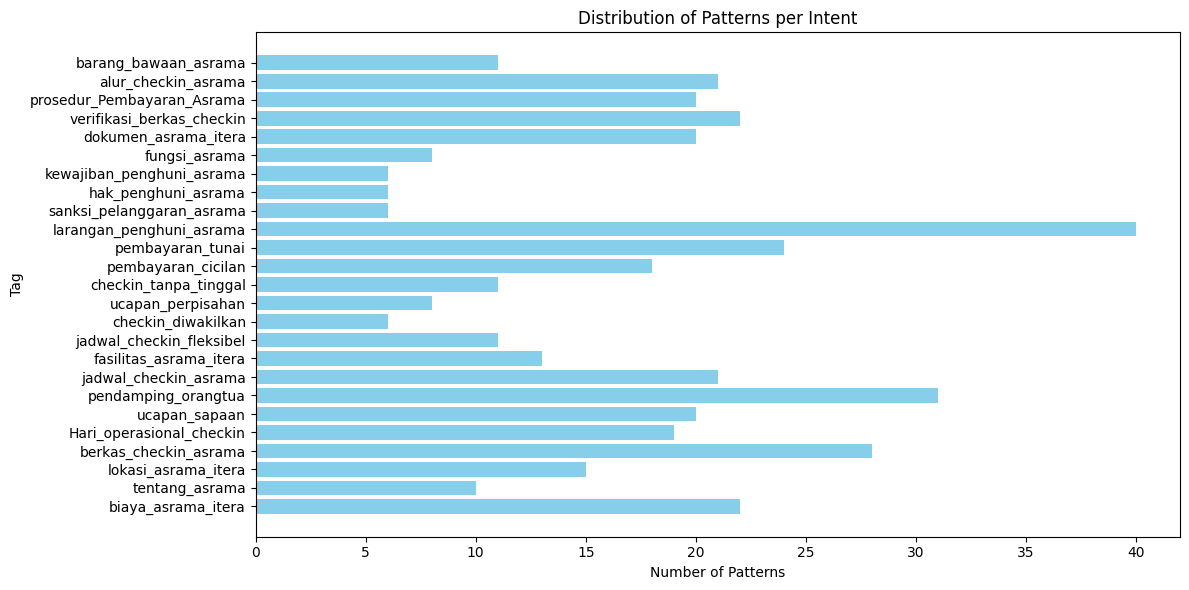

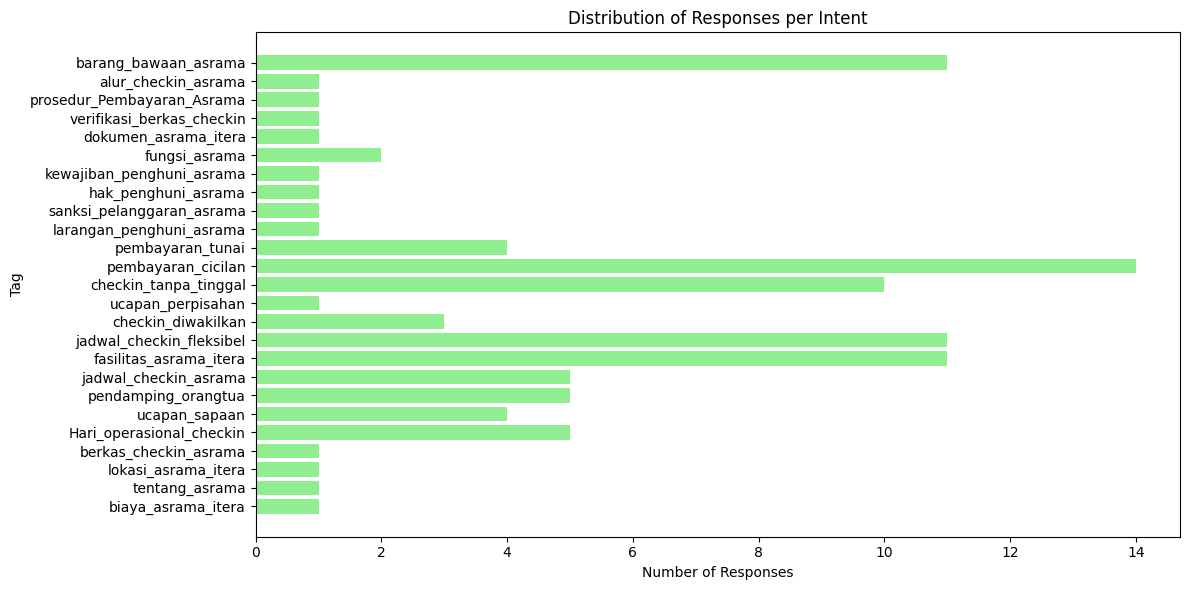

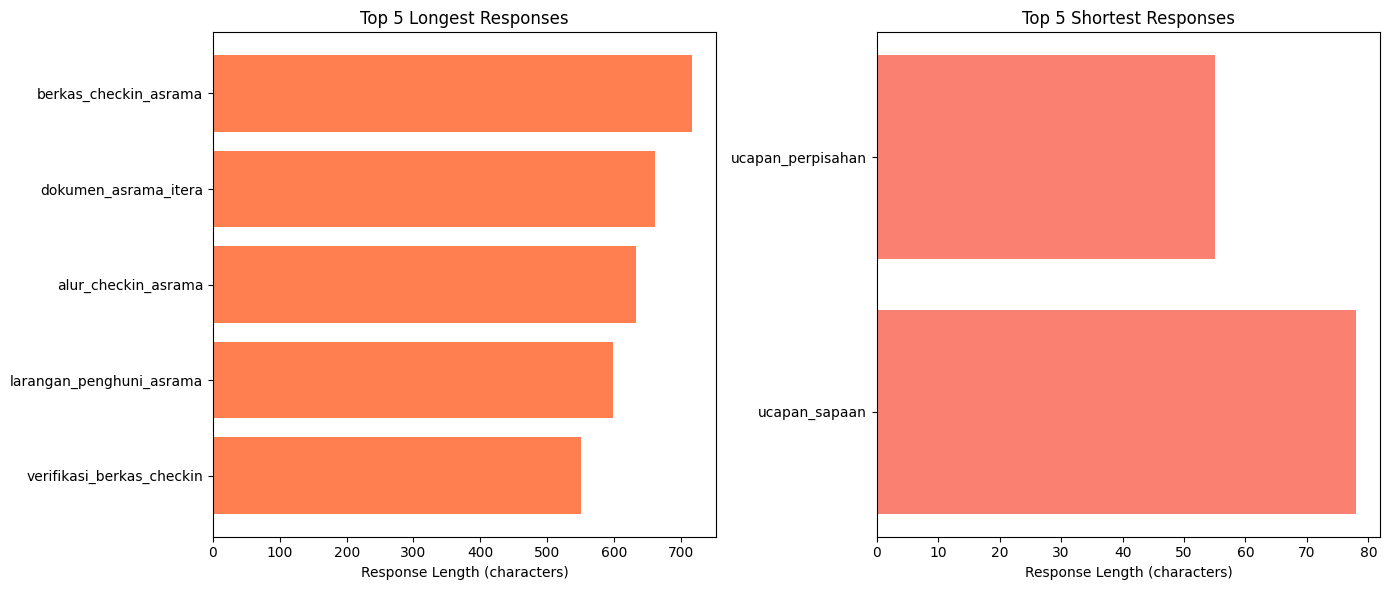

In [ ]:
import matplotlib.pyplot as plt

# Plot 1: Distribusi patterns per intent
plt.figure(figsize=(12, 6))
plt.barh(patterns_distribution["tag"], patterns_distribution["num_patterns"], color="skyblue")
plt.xlabel("Number of Patterns")
plt.ylabel("Tag")
plt.title("Distribution of Patterns per Intent")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Plot 2: Distribusi responses per intent
plt.figure(figsize=(12, 6))
plt.barh(responses_distribution["tag"], responses_distribution["num_responses"], color="lightgreen")
plt.xlabel("Number of Responses")
plt.ylabel("Tag")
plt.title("Distribution of Responses per Intent")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Plot 3: panjang responses (top 5 longest and shortest)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Longest responses
axes[0].barh(longest_responses["tag"], longest_responses["length"], color="coral")
axes[0].set_title("Top 5 Longest Responses")
axes[0].set_xlabel("Response Length (characters)")
axes[0].invert_yaxis()

# Shortest responses
axes[1].barh(shortest_responses["tag"], shortest_responses["length"], color="salmon")
axes[1].set_title("Top 5 Shortest Responses")
axes[1].set_xlabel("Response Length (characters)")
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()


In [ ]:
# semua hasil EDA
df = pd.DataFrame(intents_data)
df

,tag,num_patterns,num_responses,patterns,responses
0,barang_bawaan_asrama,11,11,[Barang pribadi apa saja yang perlu dibawa ke ...,[Mahasiswa dibebaskan untuk membawa barang pri...
1,alur_checkin_asrama,21,1,"[Apa itu prosedur check-in Asrama ITERA?, Baga...",[Selamat datang di Asrama Mahasiswa ITERA! Pro...
2,prosedur_Pembayaran_Asrama,20,1,"[Bagaimana prosedur pembayaran asrama?, Cara m...",[Prosedur Pembayaran:\n\n1. Setelah mengisi fo...
3,verifikasi_berkas_checkin,22,1,[Bagaimana proses verifikasi berkas fisik untu...,[Proses Check-In Fisik:\n\n1. Datang langsung ...
4,dokumen_asrama_itera,20,1,"[dokumen asrama, unduh dokumen asrama, Surat r...",[Surat rekomendasi pendaftaran Kakak Asrama: [...
5,fungsi_asrama,8,2,"[Apa fungsi asrama ITERA?, Mengapa asrama ITER...",[Asrama ITERA berfungsi sebagai sarana pendidi...
6,kewajiban_penghuni_asrama,6,1,"[Apa kewajiban penghuni asrama ITERA?, Apa yan...",[Penghuni asrama ITERA memiliki kewajiban untu...
7,hak_penghuni_asrama,6,1,"[Apa hak penghuni asrama ITERA?, Apa saja hak ...",[Penghuni asrama ITERA memiliki hak untuk:\n\n...
8,sanksi_pelanggaran_asrama,6,1,[Apa sanksi jika melanggar peraturan asrama IT...,[Penghuni yang melanggar peraturan asrama ITER...
9,larangan_penghuni_asrama,40,1,"[Apa saja yang dilarang di asrama ITERA?, Lara...",[Penghuni asrama ITERA dilarang untuk:\n\n1. M...


In [7]:
# Menghitung frekuensi kata dalam dataset
import pandas as pd
from collections import Counter
import re

# Fungsi untuk menghitung frekuensi kata
def calculate_word_frequency(patterns):
    # Gabungkan semua teks dalam patterns menjadi satu string
    all_text = ' '.join(patterns)

    # Hapus tanda baca dan ubah teks menjadi huruf kecil
    all_text = re.sub(r'[^\w\s]', '', all_text).lower()

    # Hitung frekuensi kata
    word_counts = Counter(all_text.split())

    # Konversi hasil ke DataFrame
    word_freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'frequency'])
    word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False)

    return word_freq_df

# Ekstrak semua patterns
patterns = []
for intent in data["intents"]:
    patterns.extend(intent['patterns'])

# Hitung frekuensi kata
word_frequency_df = calculate_word_frequency(patterns)

# Tampilkan hasil
print(word_frequency_df.head(50))


              word  frequency
8           asrama        321
25           itera        214
2              apa        131
11         checkin        112
15              di        102
129         apakah         82
4             yang         81
21           untuk         65
13       mahasiswa         62
3             saja         47
132          kamar         46
51           biaya         40
10            saat         34
49      pembayaran         34
36        penghuni         32
87            bisa         32
34       bagaimana         31
62         dokumen         29
127          boleh         25
42       dilakukan         25
18           masuk         25
14         tinggal         25
7               ke         24
9            harus         24
287          orang         23
91             ada         23
354            tua         22
50        membayar         22
142  diperbolehkan         21
133       bolehkah         19
295         jadwal         19
335          kapan         18
117       

# LOAD DATASET

In [8]:
# Langkah 2: Load dan Parsing Dataset
# Load file JSON
with open('/content/FAQ_Chatbot_Updated.json', 'r') as file:
    data = json.load(file)

# Parsing data intents
tags, patterns = [], []
for intent in data['intents']:
    tag = intent['tag']
    for pattern in intent['patterns']:
        tags.append(tag)
        patterns.append(pattern)

# Konversi ke DataFrame
df = pd.DataFrame({'Tag': tags, 'Pattern': patterns})

# DATA PREPROCESSING

In [9]:
# Fungsi pembersihan teks
def clean_text(text):
    # Hilangkan angka dan tanda baca
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Ubah menjadi huruf kecil
    text = text.lower()
    # Tokenisasi
    tokens = word_tokenize(text)
    # Menghapus stop words bahasa Indonesia
    tokens = [word for word in tokens if word not in stopwords.words('indonesian')]
    return ' '.join(tokens)

# Terapkan fungsi pembersihan pada kolom Pattern
df['Cleaned_Pattern'] = df['Pattern'].apply(clean_text)
print(df.head())

                    Tag                                            Pattern  \
0  barang_bawaan_asrama  Barang pribadi apa saja yang perlu dibawa ke a...   
1  barang_bawaan_asrama  Apa saja barang pribadi yang harus dibawa saat...   
2  barang_bawaan_asrama  Barang apa yang sebaiknya dibawa mahasiswa saa...   
3  barang_bawaan_asrama  Apa saja keperluan pribadi yang perlu dibawa k...   
4  barang_bawaan_asrama  Apa saja barang penting yang perlu disiapkan u...   

                          Cleaned_Pattern  
0            barang pribadi dibawa asrama  
1    barang pribadi dibawa checkin asrama  
2  barang dibawa mahasiswa tinggal asrama  
3   keperluan pribadi dibawa masuk asrama  
4         barang disiapkan tinggal asrama  


# FEATURE ENGINEERING

In [10]:
from sklearn.preprocessing import LabelEncoder

# Encoding label (Tag)
label_encoder = LabelEncoder()
df['Encoded_Tag'] = label_encoder.fit_transform(df['Tag'])

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000)  # Batasi hingga 1000 fitur
X = vectorizer.fit_transform(df['Cleaned_Pattern']).toarray()
y = df['Encoded_Tag']

In [11]:
#Handle class (tag) imbalance
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Memperbaiki kode untuk mendapatkan teks yang di-resample
texts_resampled = [df['Cleaned_Pattern'][i] for i in ros.sample_indices_]

In [12]:
# Memisahkan dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")

Jumlah data latih: 800
Jumlah data uji: 200


# MODELLING

In [13]:
# Model Naive Bayes
model = MultinomialNB()

# Melatih model
model.fit(X_train, y_train)


MultinomialNB()

# EVALUASI MODEL

In [14]:
# Langkah 7: Evaluasi Model
# Prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
                             precision    recall  f1-score   support

  Hari_operasional_checkin       0.88      1.00      0.93         7
       alur_checkin_asrama       0.55      1.00      0.71         6
      barang_bawaan_asrama       0.75      1.00      0.86         3
     berkas_checkin_asrama       0.88      0.78      0.82         9
        biaya_asrama_itera       1.00      0.75      0.86         4
        checkin_diwakilkan       1.00      1.00      1.00        12
     checkin_tanpa_tinggal       1.00      1.00      1.00         7
      dokumen_asrama_itera       1.00      1.00      1.00         9
    fasilitas_asrama_itera       1.00      1.00      1.00         8
             fungsi_asrama       1.00      0.91      0.95        11
       hak_penghuni_asrama       1.00      1.00      1.00        10
     jadwal_checkin_asrama       1.00      0.50      0.67         8
  jadwal_checkin_fleksibel       1.00      1.00      1.00         7
 kewajiban_penghuni_asr

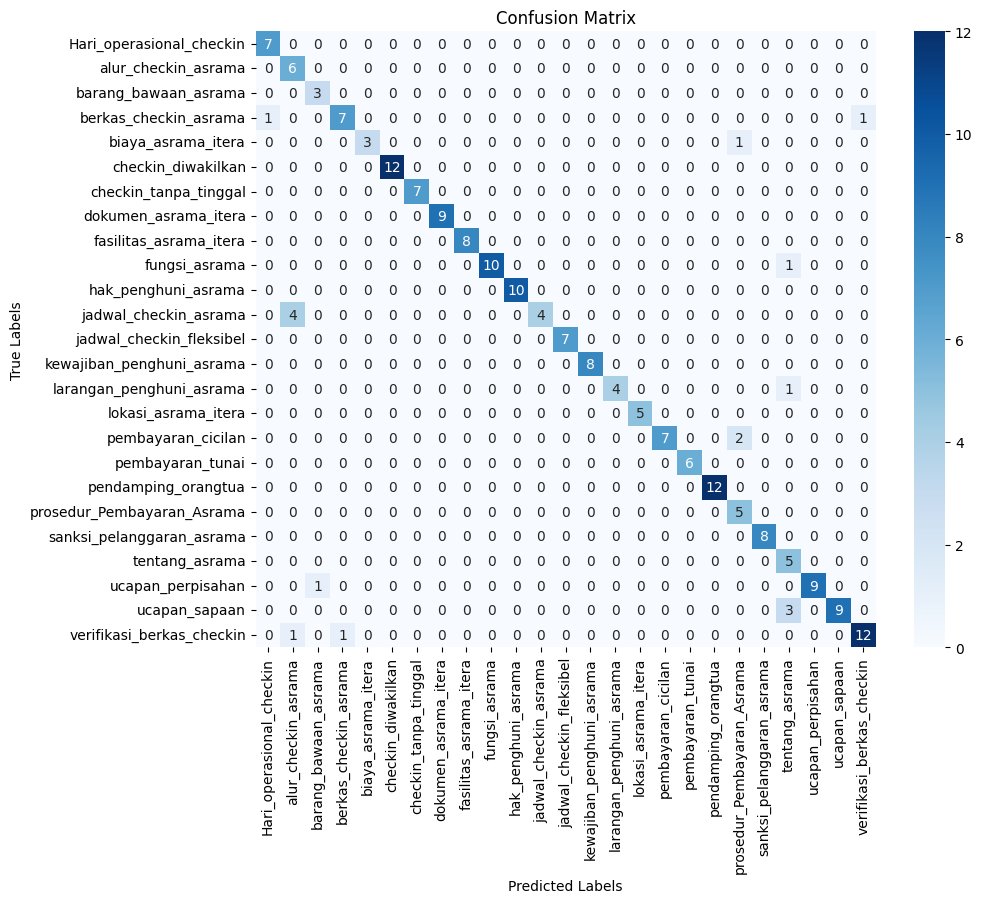

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Akurasi: 0.92
Precision: 0.95
Recall: 0.92
F1-score: 0.92


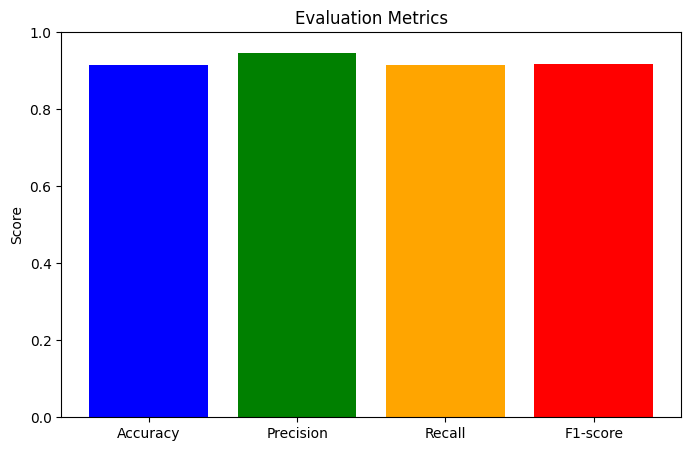

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Menghitung metrik
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Menampilkan metrik
print(f"Akurasi: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Bar plot untuk visualisasi metrik
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}
plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'orange', 'red'])
plt.title("Evaluation Metrics")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.show()


In [17]:
# Akurasi pada data latih
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Akurasi pada data uji
test_accuracy = accuracy_score(y_test, y_pred)

# Menampilkan hasil
print(f"Akurasi Data Latih: {train_accuracy:.2f}")
print(f"Akurasi Data Uji: {test_accuracy:.2f}")


Akurasi Data Latih: 0.94
Akurasi Data Uji: 0.92


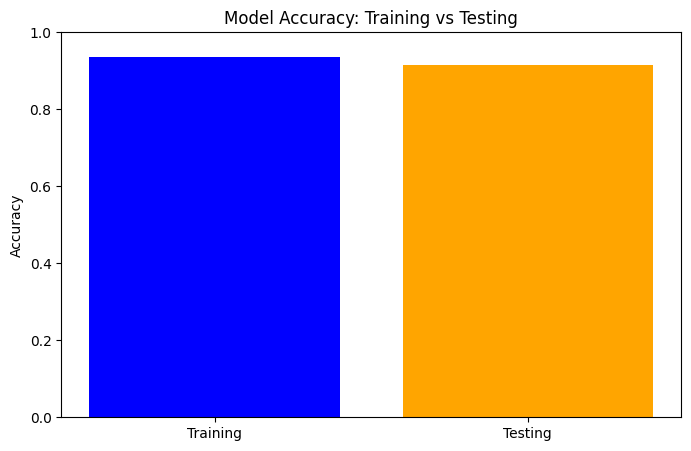

In [18]:
# Data untuk visualisasi
datasets = ['Training', 'Testing']
accuracies = [train_accuracy, test_accuracy]

# Plot akurasi
plt.figure(figsize=(8, 5))
plt.bar(datasets, accuracies, color=['blue', 'orange'])
plt.title("Model Accuracy: Training vs Testing")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.show()


**Overfitting**:

- Jika akurasi data latih jauh lebih tinggi dibandingkan dengan akurasi data uji, model mengalami overfitting.

Ini menunjukkan model terlalu fokus pada data latih hingga gagal menggeneralisasi pada data baru.

**Underfitting**:

- Jika akurasi data latih dan uji sama-sama rendah, model mengalami underfitting.
Ini menunjukkan model gagal menangkap pola dalam data.

**Ideal**:

Akurasi data latih dan data uji seimbang, serta keduanya tinggi.

# TESTING CHATBOT

In [19]:
import json
import re
import nltk
import pandas as pd
import numpy as np
import random
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder

In [26]:
import joblib

# Load the saved model
model = joblib.load('naive_bayes_model.pkl')

# Load the saved vectorizer
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Load the saved label encoder
label_encoder = joblib.load('label_encoder.pkl')

# Load data dari file JSON
file_path = "/content/FAQ_Chatbot_Updated.json"
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

print("Model, vectorizer, label encoder, dan dataset telah dimuat!")

Model, vectorizer, label encoder, dan dataset telah dimuat!


In [21]:
# Langkah 8: Fungsi Testing Chatbot
def chatbot_response(input_text):
    cleaned_text = clean_text(input_text)              # Preprocessing input pengguna
    vectorized_text = vectorizer.transform([cleaned_text])  # Vectorization
    predicted_tag = model.predict(vectorized_text)          # Prediksi tag
    predicted_tag_label = label_encoder.inverse_transform(predicted_tag)[0]  # Decode label
    # Cari respon berdasarkan tag yang diprediksi
    for intent in data['intents']:
        if intent['tag'] == predicted_tag_label:
            return np.random.choice(intent['responses'])  # Pilih satu respon secara acak

In [24]:
import string

while True:
    # Prompt pengguna
    user_input = input('👨‍🦰 Kamu : ')

    # Periksa apakah pengguna ingin keluar
    if user_input.lower() in ['keluar', 'quit', 'exit']:
        print("🤖 ChatbotX: Sampai jumpa!")
        break

    # Langkah 1: Preprocessing Input
    processed_input = ''.join([char.lower() for char in user_input if char not in string.punctuation])

    try:
        # Vektorisasi menggunakan TF-IDF
        input_vector = vectorizer.transform([processed_input])  # Gunakan vectorizer yang sudah dilatih sebelumnya

        # Langkah 2: Prediksi dengan Model Naive Bayes
        predicted_tag_index = model.predict(input_vector)[0]
        confidence = max(model.predict_proba(input_vector)[0])
        response_tag = label_encoder.inverse_transform([predicted_tag_index])[0]

        # Langkah 3: Menampilkan Respon
        for intent in data['intents']:
            if intent['tag'] == response_tag:
                response = random.choice(intent['responses'])  # Pilih respon acak dari tag
                print(f"(Tag: {response_tag}, Confidence: {confidence:.2f})")
                print(f"🤖 ChatbotX: {response}")

                # Jika respon adalah salah satu kata perpisahan, keluar dari perulangan utama
                if response.lower() in ['bye', 'selamat tinggal', 'sampai nanti', 'keluar', 'daa']:
                    print("🤖 ChatbotX: Sampai jumpa!")
                    exit()

    except Exception as e:
        print("🤖 ChatbotX: Maaf, saya tidak mengerti. Coba masukkan input yang lebih jelas.")
        print(f"Debug Info: {e}")


👨‍🦰 Kamu : halo
(Tag: ucapan_sapaan, Confidence: 0.14)
🤖 ChatbotX: Hello kenalkan saya chatbot FAQ yang siap menjawab pertanyaan anda
👨‍🦰 Kamu : apa saja fasilitas asrama itera
(Tag: fasilitas_asrama_itera, Confidence: 0.39)
🤖 ChatbotX: Satu kamar asrama akan dihuni oleh 3-4 mahasiswa dengan fasilitas kasur, bantal, lemari, kamar mandi, meja, dan kursi belajar. Listrik dan air gratis, serta ada lapangan bola dan taman untuk aktivitas luar ruangan.
👨‍🦰 Kamu : jadwal asrama 
(Tag: jadwal_checkin_asrama, Confidence: 0.26)
🤖 ChatbotX: Jadwal check-in Asrama periode 2024/2025 akan diinformasikan lebih lanjut, karena pengumuman penghuni asrama masih menunggu hasil seleksi mahasiswa baru jalur SNBT.
👨‍🦰 Kamu : apa boleh membawa orang tua ke dalam asrama ?
(Tag: pendamping_orangtua, Confidence: 0.20)
🤖 ChatbotX: Dilarang, orang tua hanya boleh mengantar mahasiswa hingga ke lantai dasar. Bantuan untuk kebutuhan lain akan disediakan oleh kakak asrama di masing-masing lantai.


KeyboardInterrupt: Interrupted by user

#SAVE MODEL

In [ ]:
import joblib

# Simpan model Naive Bayes ke file
joblib.dump(model, 'naive_bayes_model.pkl')

# Simpan vektorisasi TF-IDF ke file
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

# Simpan label encoder ke file
joblib.dump(label_encoder, 'label_encoder.pkl')

print("Model, vectorizer, dan label encoder telah disimpan!")

Model, vectorizer, dan label encoder telah disimpan!
